# Nearest Neighbor and Qudratic discriminant analysis

In this exercise we are going to see a comparison of the Nearest Neighbor and the QDA classifier on three datasets aleardy included in the sklearn package.

Import all packages that we need.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

a) Create the data sets

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2) # randomize testset more for a more challenging distribution (to easily separable even with LDA otherwise)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
### Create dataset moons ###
moons = make_moons(noise=0.3, random_state=0)
### Create dataset circles ###
circles = make_circles(noise=0.2, factor=0.5, random_state=1)

datasets = [moons, circles, linearly_separable]

b) Visualize the three datasets

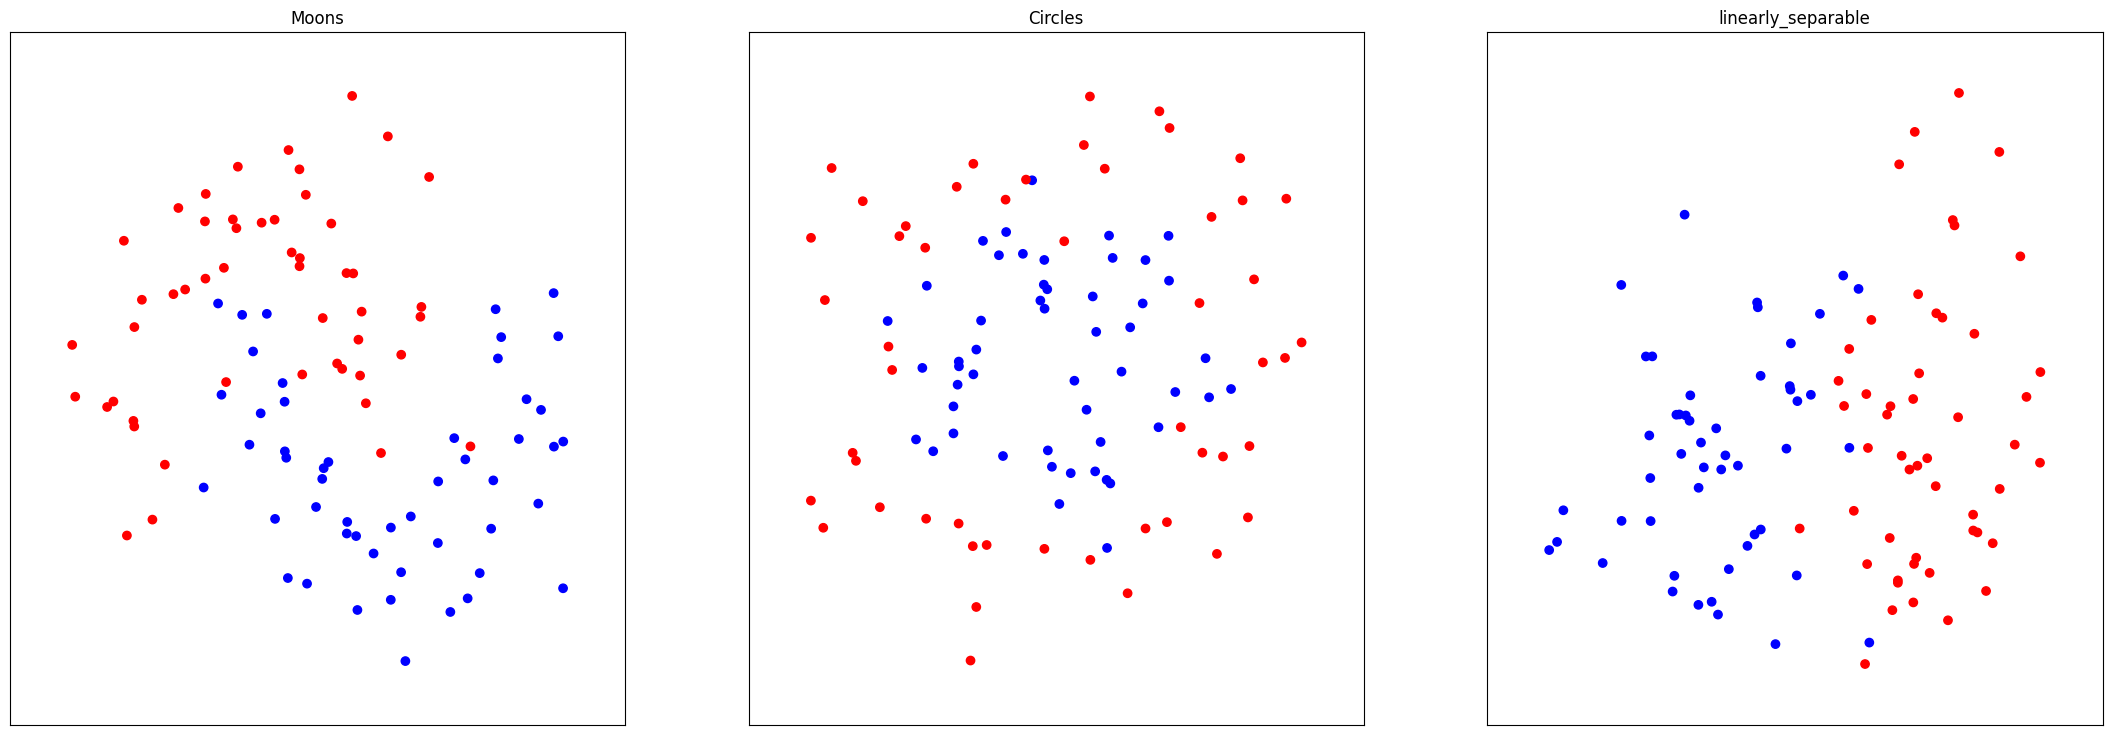

In [43]:
figure = plt.figure(figsize=(27,9))

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)

    x1_min, x1_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    x2_min, x2_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, len(datasets), ds_cnt+1)

    if ds_cnt==0:
        ax.set_title("Moons")
    elif ds_cnt==1:
        ax.set_title("Circles")
    else:
        ax.set_title("linearly_separable")

    ax.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright)
    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
    ax.set_xticks(())
    ax.set_yticks(())

c) Define the classifiers.

In [50]:
names = ["Nearest Neighbor", "QDA"]
classifiers = [KNeighborsClassifier(3), QuadraticDiscriminantAnalysis()]

d) For each dataset do the following:
- Scale the data points to unit variance
- Split the dataset into test and training set, where the test set contains 40% of the data points
- Visualize again the dataset, to distinguish between test and training set, by adding a transparency of 0.6 to the points of the test set
- Apply both of the classifiers to the respective training set and plot the results

Nearest Neighbor 0 0.825
QDA 0 0.775
Nearest Neighbor 1 0.925
QDA 1 0.875
Nearest Neighbor 2 0.975
QDA 2 0.95


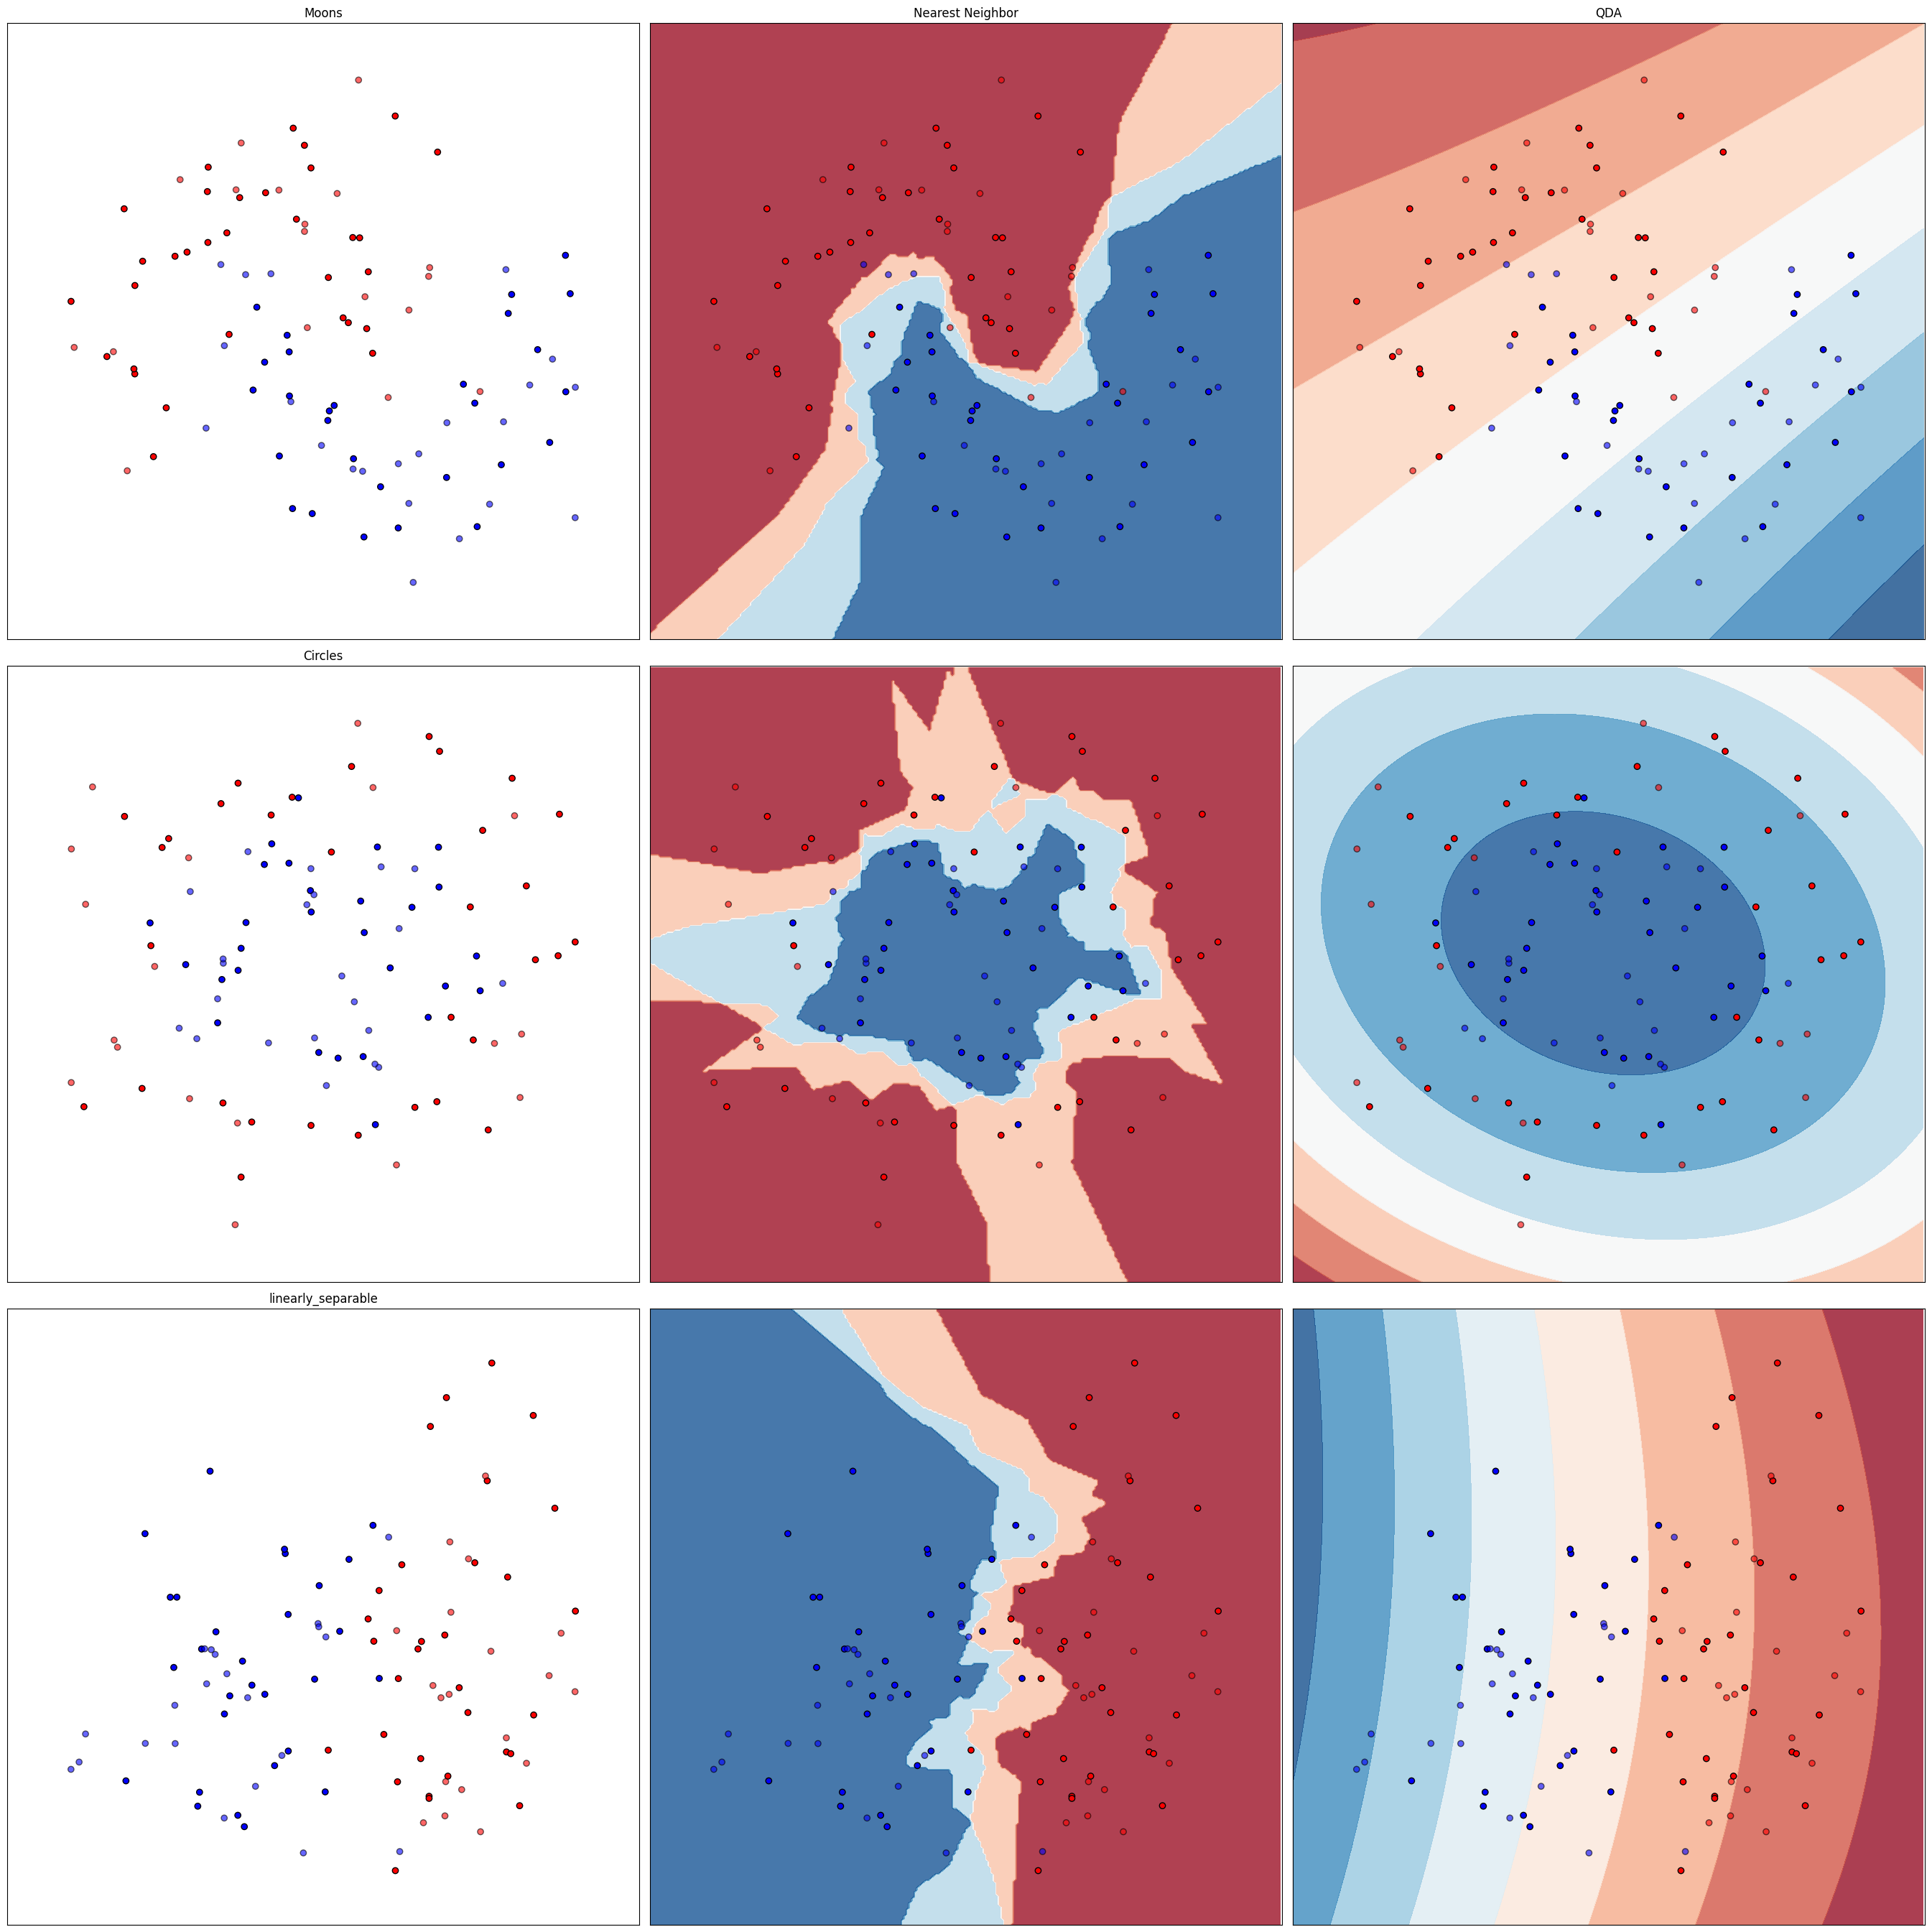

In [51]:
figure = plt.figure(figsize=(27,27))

i = 1

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

    x1_min, x1_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    x2_min, x2_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

    if ds_cnt==0:
        ax.set_title("Moons")
    elif ds_cnt==1:
        ax.set_title("Circles")
    else:
        ax.set_title("linearly_separable")

    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright, edgecolor='k')
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolor='k')
    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(name, ds_cnt, score)

        x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))

        if hasattr(clf, 'decision_function'):
            Z = clf.decision_function(np.c_[x1_grid.ravel(), x2_grid.ravel()])
        else:
            Z = clf.predict_proba(np.c_[x1_grid.ravel(), x2_grid.ravel()])[:, 1]

        ax = plt.subplot(len(datasets), len(classifiers)+1, i)
        cm = plt.cm.RdBu 
        Z = Z.reshape(x1_grid.shape)
        ax.contourf(x1_grid, x2_grid, Z, cmap=cm, alpha = 0.8)

        ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright, edgecolor='k')
        ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolor='k')
        ax.set_xlim(x1_min, x1_max)
        ax.set_ylim(x2_min, x2_max)
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt == 0:
            ax.set_title(name)
        i += 1
plt.tight_layout()